<a href="https://colab.research.google.com/drive/1crrTwoMC-m8yAogw-sbgm358otTn2cSt" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELLS - Practical Introduction into Programming with Python

<a href="https://pef.czu.cz/en/"><img src="https://aleksejalex.4fan.cz/ells/temp_banner.jpeg?22" alt="banner" width="1000"></a>



[GitHub Repository](https://github.com/aleksejalex/2024_ells_python)


Plan for this lecture:
 - basic statistical analysis
 - linear regression
 - multiple regression
 - prediction

## Seaborn

<a href="https://seaborn.pydata.org/"><img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="banner" width="400" align="right"></a>= Python data visualization library based on Matplotlib
 - **Data Visualization Simplification**: Provides an easy and high-level interface for creating attractive and informative statistical graphics.
 - **Statistical Estimations**: Automatically computes and plots statistical estimations like confidence intervals and regression lines.
 - **Statistical Plotting**: Facilitates plotting statistical graphics like distributions, regression models, and categorical data visualization.
 - [documentation](https://seaborn.pydata.org/)

## Statsmodels

<a href="https://www.statsmodels.org"><img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="banner" width="400" align="right"></a>= Python library built specifically for statistics
 - **Statistical Modeling**: Provides tools for estimating and testing a wide range of statistical models, including linear models.
 - **Multivariate Analysis**: Supports advanced multivariate techniques.
 - **Model Diagnostics and Validation**: Provides extensive tools for model diagnostics, residual analysis, and goodness-of-fit testing to ensure robust and accurate models.
 - [documentation](https://www.statsmodels.org/stable/index.html)

## Basic statistical analysis


*   Collect, summarize, and interpret data
*   Use descriptive statistics like mean, median, and standard deviation.
*   Visual analysis using graphs
* Detecting patterns and outlying observations in the data



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/Alzpeta/c34c4959c7a10f7c70c0c93d102a4646/raw/41a9f1bbaae4a48cad668e7044f763c77a992116/gistfile2.txt')

# source https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales

In [3]:
df
# we have two variables - Temperature in Fahrenheit, Ice Cream profit in $USD

,Temperature,Ice_Cream_Profit
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
5,43,15.88
6,44,19.07
7,44,19.57
8,45,21.62
9,45,22.34


In [4]:
temperature = df['Temperature']
ice_cream_profit = df['Ice_Cream_Profit']


In [5]:
# Calculate statistics for temperature
mean_temperature = np.mean(temperature)
std_dev_temperature = np.std(temperature)
median_temperature = np.median(temperature)
max_temperature = temperature.max()
min_temperature = temperature.min()


print("Temperature:")
print("Mean:", mean_temperature)
print("Standard Deviation:", std_dev_temperature)
print("Median:", median_temperature)
print("Max:", max_temperature)
print("Min:", min_temperature)

Temperature:
Mean: 44.9
Standard Deviation: 2.7910571473905725
Median: 45.0
Max: 48
Min: 39


In [6]:
# Calculate statistics for ice cream profit
mean_ice_cream_profit = np.mean(ice_cream_profit)
std_dev_ice_cream_profit = np.std(ice_cream_profit)
median_ice_cream_profit = np.median(ice_cream_profit)
max_ice_cream_profit = ice_cream_profit.max()
min_ice_cream_profit = ice_cream_profit.min()

print("Ice cream profit:")
print("Mean:", mean_ice_cream_profit)
print("Standard Deviation:", std_dev_ice_cream_profit)
print("Median:", median_ice_cream_profit)
print("Max:", max_ice_cream_profit)
print("Min:", min_ice_cream_profit)

Ice cream profit:
Mean: 20.341
Standard Deviation: 3.7456279847309983
Median: 20.53
Max: 26.41
Min: 11.88


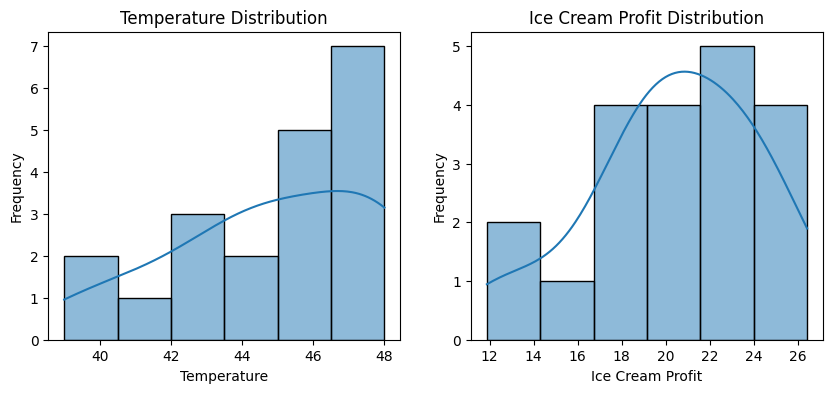

In [7]:
# Distribution plot for temperature
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(temperature, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Distribution plot for ice cream profit
plt.subplot(1, 2, 2)
sns.histplot(ice_cream_profit, kde=True)
plt.title('Ice Cream Profit Distribution')
plt.xlabel('Ice Cream Profit')
plt.ylabel('Frequency')
plt.show()


## Linear regression

**Goal**:
To model the relationship between a dependent and an independent variable using a linear equation.


*   **Linear Relationship**:
  Assumes a straight-line relationship between the dependent variable ($Y$) and the independent variable ($X$).
  *  in our example, the dependent variable is the ice cream profit. The independent variable is the temperature
*   **Equation of the Line**:
  * $Y = \alpha + \beta X + \epsilon$
      * $Y$ = dependent variable
      * $X$ = independent variable
      * α = intercept
      * β = the slope of the line
      * ϵ = the error term.





Text(0.5, 1.0, 'temperature vs. ice cream profit')

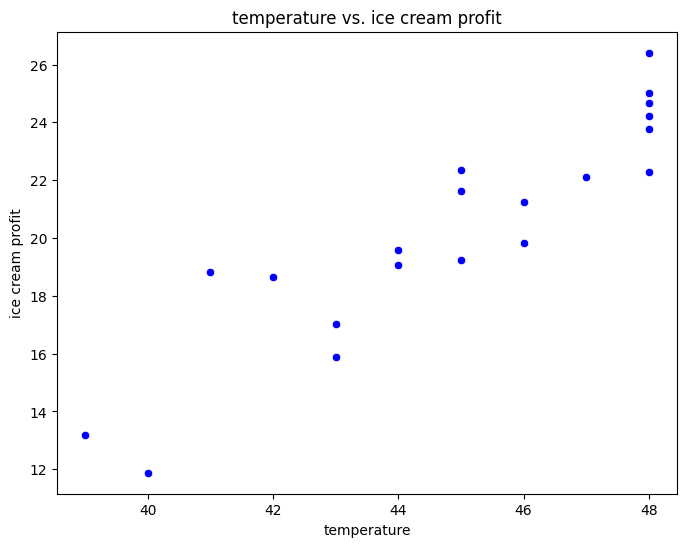

In [8]:
# Create a scatter plot to visualize the relationship between the variables.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=temperature, y=ice_cream_profit, color='blue')
plt.xlabel('temperature')
plt.ylabel('ice cream profit')
plt.title('temperature vs. ice cream profit')



**Slope and Intercept in Linear Regression**

The formula for the slope β is:


$\beta = \frac{ \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) }{ \sum_{i=1}^{n} (X_i - \bar{X})^2 }$

The formula for the intercept α is:


$\alpha = \bar{Y} - \beta \bar{X}$

Where:
- $X_i$ and $Y_i$ are the individual sample points.
- $\bar{X}$ and $\bar{Y}$ are the means of $X$ and $Y$ respectively.

In [9]:
# Estimate Parameters:
slope, intercept = np.polyfit(temperature, ice_cream_profit, 1)
print("slope:", slope)
print("intercept:", intercept)

slope: 1.2263286264441606
intercept: -34.7211553273428


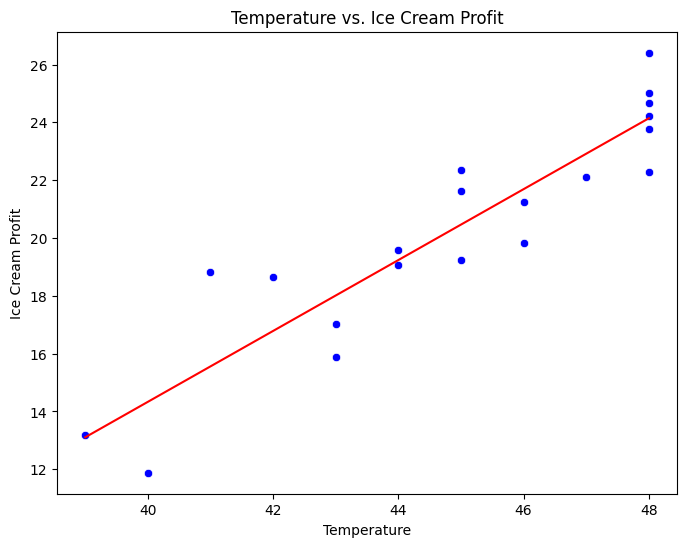

In [10]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=temperature, y=ice_cream_profit, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profit')
plt.title('Temperature vs. Ice Cream Profit')

# Add regression line
plt.plot(temperature, slope * temperature + intercept, color='red')

plt.show()


<Figure size 800x600 with 0 Axes>

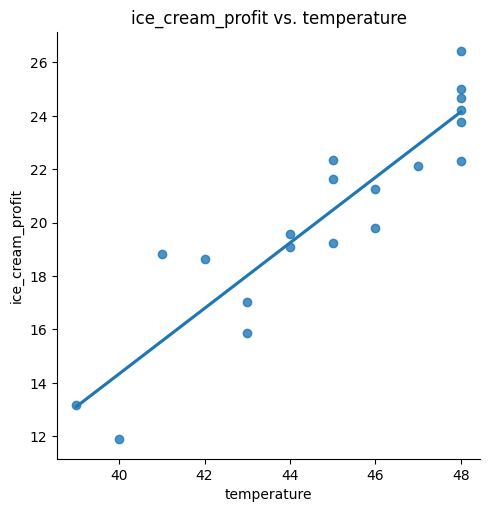

In [11]:
# Calculate linear regression using Seaborn library
# For this, we have to work with the pandas dataframe

data = pd.DataFrame({'ice_cream_profit': ice_cream_profit, 'temperature': temperature})
# Plot with Seaborn
plt.figure(figsize=(8, 6))


sns.lmplot(x='temperature', y='ice_cream_profit', data=data, ci=None)
plt.xlabel('temperature')
plt.ylabel('ice_cream_profit')
plt.title('ice_cream_profit vs. temperature')

plt.show()


**Model validation and prediction**


*  Using a variety of statistical indicators, we can determine how well the model actually fits to explain the behaviour of the dependent variable
*  one such indicator is the **Coefficient of determination**
  *   is denoted $R^2$ and is often reffered as *R-squared*
  * Coefficient of determination indicates the proportion of variance in the dependent variable that is predictable from the independent variable
    * If $R^2$ is 1: It means that 100% of the changes in Y can be explained by X.
    * If $R^2$ is 0: It means that X does not explain any of the changes in Y.
    * For example, if  $R^2$ is 0.8, it means 80% of the variation in Y can be predicted by X, and 20% is due to other factors or randomness.

**Calculation of Coefficient of Determination (R²)**



$R^2 = 1 - \frac{\sum_{i=1}^{n} (Y_i - \hat{Y_i})^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}$

Where:

* $Y_i$ = actual value of the dependent variable
* $\hat{Y_i}$ = predicted value of the dependent variable
* $\bar{Y}$ = mean of the actual values
* $\sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$ = sum of squared residuals (SS_res)
* $\sum_{i=1}^{n} (Y_i - \bar{Y})^2$  = total sum of squares (SS_tot)


**Explanation of the Steps:**

1. **Actual Values $Y_i$:** These are the observed values of the dependent variable from the data.

2. **Predicted Values $\hat{Y_i}$:** These are the values predicted by the regression model.

3. **Mean of Actual Values $\bar{Y}$:** This is the average of all the observed values of the dependent variable.

4. **Sum of Squared Residuals (SS_res):**
   $
   \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
   $
   - This is the sum of the squared differences between the actual values and the predicted values.
   - It measures how much the predicted values deviate from the actual values.

5. **Total Sum of Squares (SS_tot):**
   $\sum_{i=1}^{n} (Y_i - \bar{Y})^2$
   - This is the sum of the squared differences between the actual values and their mean.
   - It measures the total variation in the actual values.

6. **Calculation of Coefficient of determination:**
   $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
   - The ratio $\frac{SS_{res}}{SS_{tot}}$ represents the proportion of the total variance that is not explained by the model.
   - Subtracting this ratio from 1 gives the proportion of the variance that is explained by the model.







In [12]:
# calculation of predicted values of the Y variable
predicted_profits = []

for t in temperature:

  profit = slope * t + intercept
  predicted_profits.append(profit)


#mean of the actual values
mean_ice_cream_profit

SS_res = 0
index = 0
for i in ice_cream_profit:
    difference = (i - predicted_profits[index])**2
    SS_res = SS_res + difference
    index = index + 1


SS_total = 0

for i in ice_cream_profit:
    difference = (i - mean_ice_cream_profit)**2
    SS_total = SS_total + difference





In [13]:
# Calculate R^2
r_squared = 1 - (SS_res / SS_total)
print("R^2:", r_squared)

R^2: 0.8350296717266381


**Prediction**

We now know the regression equation for the relationship of profit from ice cream sales depending on daily temperature

$Y = -34.72 + 1.23*X$
*   where
  * $Y$ = ice cream profit
  * $X$ = temperature

Based on this knowledge, we can predict the profit based on given temperature

      


In [14]:
new_temperature= 49

predicted_profit = intercept + slope*new_temperature

print("Predicted ice cream profit:", predicted_profit)


Predicted ice cream profit: 25.36894736842107


**Residual Plot**

We can plot the residuals (differences between observed and predicted values) to check for patterns. Ideally, the residuals should be **randomly scattered around zero** without any clear pattern. This suggests that the model fits well

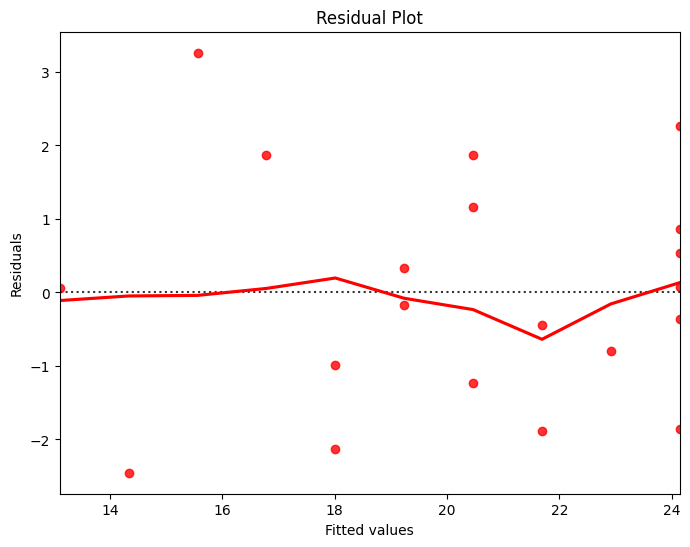

In [15]:
# Plot the residuals
residuals = []
index = 0
for p in predicted_profits:

  residual = ice_cream_profit[index] - p
  residuals.append(residual)
  index = index + 1


plt.figure(figsize=(8, 6))
sns.residplot(x=predicted_profits, y=residuals, lowess=True, color='r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Multiple Linear Regression
**Goal**: To model the relationship between a dependent variable and two or more independent variables using a linear equation.

* **Multiple Linear Relationship**: Assumes a linear relationship between the dependent variable ($Y$) and multiple independent variables ($X1, X2, ..., Xn$).
In our example, the dependent variable is the income, the two independent variables are the age and the experience.

* **Equation of the Line**:
  * $Y = α + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + ϵ $
    * $Y$ = dependent variable
    * $X_1,X_2, ... , X_n$ = multiple independent variables
    * α = intercept
    * $β_1,β_1,...,β_n$ = coefficients representing the slope of the line for each independent variable
    * ϵ = error term





In [16]:
df = pd.read_csv('https://gist.githubusercontent.com/Alzpeta/c34c4959c7a10f7c70c0c93d102a4646/raw/41a9f1bbaae4a48cad668e7044f763c77a992116/gistfile1.txt')

#source: https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset

In [17]:
df
# we have three variables - age, years of experience and income

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [18]:
age = df['age']
experience = df['experience']
income = df['income']

In [19]:
# Calculate statistics for age
mean_age = np.mean(age)
std_dev_age = np.std(age)
median_age = np.median(age)
min_age = np.min(age)
max_age = np.max(age)

print("Age:")
print("Mean:", mean_age)
print("Standard Deviation:", std_dev_age)
print("Median:", median_age)
print("Min:", min_age)
print("Max:", max_age)

Age:
Mean: 39.65
Standard Deviation: 9.7738170639725
Median: 40.0
Min: 23
Max: 58


In [20]:
# Calculate statistics for experience
mean_experience = np.mean(experience)
std_dev_experience = np.std(experience)
median_experience = np.median(experience)
min_experience = np.min(experience)
max_experience = np.max(experience)

print("Experience:")
print("Mean:", mean_experience)
print("Standard Deviation:", std_dev_experience)
print("Median:", median_experience)
print("Min:", min_experience)
print("Max:", max_experience)

Experience:
Mean: 6.2
Standard Deviation: 4.019950248448356
Median: 5.0
Min: 1
Max: 17


In [21]:
# Calculate statistics for income
mean_income = np.mean(income)
std_dev_income = np.std(income)
median_income = np.median(income)
min_income = np.min(income)
max_income = np.max(income)

print("Income:")
print("Mean:", mean_income)
print("Standard Deviation:", std_dev_income)
print("Median:", median_income)
print("Min:", min_income)
print("Max:", max_income)

Income:
Mean: 40735.5
Standard Deviation: 8226.097176061076
Median: 40190.0
Min: 27840
Max: 63600


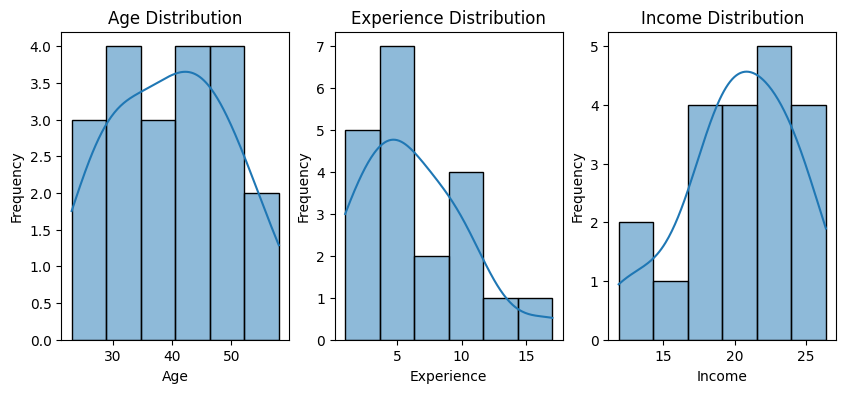

In [22]:
# Distribution plot for age
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(age, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Distribution plot for experience
plt.subplot(1, 3, 2)
sns.histplot(experience, kde=True)
plt.title('Experience Distribution')
plt.xlabel('Experience')
plt.ylabel('Frequency')


# Distribution plot for income
plt.subplot(1, 3, 3)
sns.histplot(ice_cream_profit, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


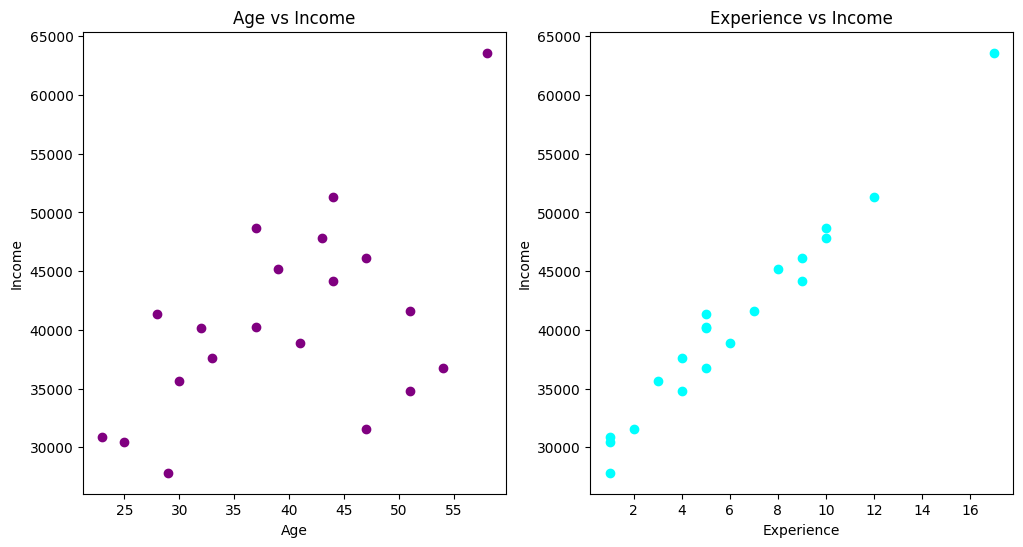

In [23]:
# Scatter plot: Age vs Income
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(age, income, color='purple')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

# Scatter plot: Experience vs Income
plt.subplot(1, 2, 2)
plt.scatter(experience, income, color='cyan')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Experience vs Income')
plt.show()

In [24]:
import statsmodels.api as sm

# Prepare the data for multiple regression
X = np.column_stack((age, experience))
X = sm.add_constant(X)  # Adds a constant term to the predictor so the intercept can be calculated
"""
in case of simple linear regression with only one
independent variable, we can skip the column_stack method and just add
our independent variable as a parameter to the add_constant method
For the first example it would be X = sm.add_constant(temperature)
"""
# Fit the model
model = sm.OLS(income, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     366.5
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.05e-14
Time:                        02:45:03   Log-Likelihood:                -170.81
No. Observations:                  20   AIC:                             347.6
Df Residuals:                      17   BIC:                             350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.126e+04   1306.437     23.929      0.0

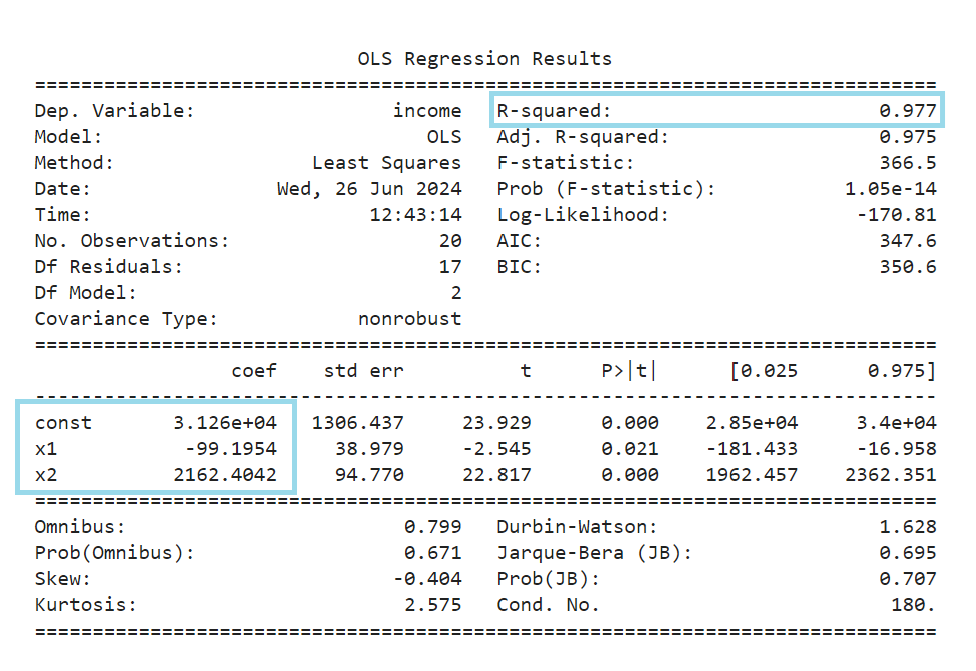

In [25]:
# Make predictions
predictions = results.predict(X)

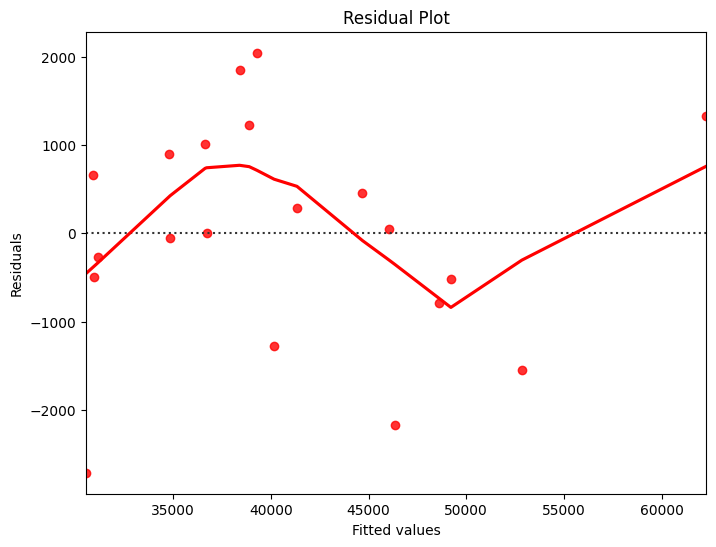

In [26]:
# Plot the residuals
residuals = income - predictions
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, color='r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


*The plot shows a pattern in the residuals, which suggests that the relationship between the predictors and the response variable may not be entirely linear. This could indicate that there might be some non-linearity in the data that the linear model is not capturing.
This could also be seen in the scatter plot representing the relationship between variables age and income*

In [27]:
# Predict income for age 27 and experience 4 years
new_data = np.array([1, 27, 4])
predicted_income = results.predict(new_data)

# Print the predicted income
print(f"Predicted Income for age 27 and 4 years of experience: {predicted_income}")

Predicted Income for age 27 and 4 years of experience: [37233.03202435]


## Summary
 - Statistical computing using python is enabled by several libraries that differ in their approach, capabilities and complexity
 - Two in particular were introduced in this notebook - Statsmodels and Seaborn
 - One possible use of these libraries is for regression problems
 - Elementary python methods or mathematical libraries like NumPy can be used for basic statistical analysis

## Additional sources (where to seek for information):
 - [Linear regression case study](https://www.kaggle.com/code/saikatkumardey/linear-regression-case-study)
 - [W3 schools multiple linear regression](https://www.w3schools.com/python/python_ml_multiple_regression.asp)

<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>
